In [5]:
import networkx as nx
import json
from eodc_pg_parser.graph import OpenEOProcessGraph

from openeo.internal.process_graph_visitor import ProcessGraphVisitor, ProcessGraphUnflattener
from eodc_pg_parser.pg_schema import ProcessNode, ResultReference, PGEdgeType
import json

In [6]:
flat_graph = json.load(open("../tests/data/pg-evi-example.json", mode="r"))
parsed_graph = OpenEOProcessGraph(pg_data=flat_graph)


Deserialised process graph into nested structure


yo
yo
yo
yo


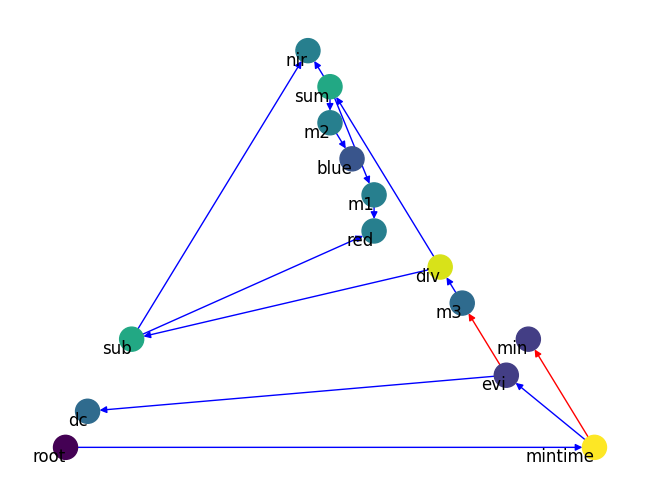

In [7]:
parsed_graph.plot()

In [8]:
nx.get_node_attributes(parsed_graph.G, "resolved_kwargs")

{'root-ecd45b0b-4b55-4820-84c2-a5ba01800474': {'data': '__MISSING__',
  'format': 'GTiff'},
 'mintime-ecd45b0b-4b55-4820-84c2-a5ba01800474': {'data': '__MISSING__',
  'dimension': 't'},
 'evi-ecd45b0b-4b55-4820-84c2-a5ba01800474': {'data': '__MISSING__',
  'dimension': 'bands'},
 'dc-ecd45b0b-4b55-4820-84c2-a5ba01800474': {'id': 'Sentinel-2',
  'spatial_extent': {'west': 16.1, 'east': 16.6, 'north': 48.6, 'south': 47.2},
  'temporal_extent': ['2018-01-01', '2018-02-01'],
  'bands': ['B02', 'B04', 'B08']},
 'm3-df59c2b6-c84a-4aec-b5e3-70a2be4aff35': {'y': '__MISSING__', 'x': '2.5'},
 'div-df59c2b6-c84a-4aec-b5e3-70a2be4aff35': {'x': '__MISSING__',
  'y': '__MISSING__'},
 'sub-df59c2b6-c84a-4aec-b5e3-70a2be4aff35': {'x': '__MISSING__',
  'y': '__MISSING__'},
 'nir-df59c2b6-c84a-4aec-b5e3-70a2be4aff35': {'data': ParameterReference(from_parameter='data'),
  'label': 'B08'},
 'red-df59c2b6-c84a-4aec-b5e3-70a2be4aff35': {'data': ParameterReference(from_parameter='data'),
  'label': 'B04'},
 

In [9]:
for edge in parsed_graph.G.edges(data=True):
    print(edge)

('root-ecd45b0b-4b55-4820-84c2-a5ba01800474', 'mintime-ecd45b0b-4b55-4820-84c2-a5ba01800474', {'reference_type': <PGEdgeType.ResultReference: 'result_reference'>, 'arg_name': 'data', 'access_function': <function ResultReference.<lambda> at 0x7f0c150a5dc0>})
('mintime-ecd45b0b-4b55-4820-84c2-a5ba01800474', 'evi-ecd45b0b-4b55-4820-84c2-a5ba01800474', {'reference_type': <PGEdgeType.ResultReference: 'result_reference'>, 'arg_name': 'data', 'access_function': <function ResultReference.<lambda> at 0x7f0c150a5dc0>})
('mintime-ecd45b0b-4b55-4820-84c2-a5ba01800474', 'min-cf163d7c-4da1-4598-817f-b9ac4cf1a1d0', {'reference_type': <PGEdgeType.Callback: 'callback'>, 'arg_name': 'reducer'})
('evi-ecd45b0b-4b55-4820-84c2-a5ba01800474', 'dc-ecd45b0b-4b55-4820-84c2-a5ba01800474', {'reference_type': <PGEdgeType.ResultReference: 'result_reference'>, 'arg_name': 'data', 'access_function': <function ResultReference.<lambda> at 0x7f0c150a5dc0>})
('evi-ecd45b0b-4b55-4820-84c2-a5ba01800474', 'm3-df59c2b6-c84a

## Experiments

In [11]:
import inspect

for edge in parsed_graph.G.out_edges:
    print("----------------------------------------------")
    # print(edge
    if parsed_graph.G.edges[edge]["reference_type"] == PGEdgeType.ResultReference:
        arg_name = parsed_graph.G.edges[edge]["arg_name"]
        node_where_parameter_belongs_to = parsed_graph.G.nodes[edge[0]]
        # print(arg_name)
        # print(node_where_parameter_belongs_to)
        # print(parsed_graph.G.nodes[edge[0]]["resolved_kwargs"])
        print(parsed_graph.G.nodes[edge[0]]["resolved_kwargs"][arg_name])
        access_func = parsed_graph.G.edges[edge]["access_function"]
        # print(inspect.getsource(access_func))
        accessed_parameter = access_func(parsed_graph.G.nodes[edge[0]]["resolved_kwargs"][arg_name])
        print(accessed_parameter)



----------------------------------------------
__MISSING__
__MISSING__
----------------------------------------------
__MISSING__
__MISSING__
----------------------------------------------
----------------------------------------------
__MISSING__
__MISSING__
----------------------------------------------
----------------------------------------------
__MISSING__
__MISSING__
----------------------------------------------
__MISSING__
__MISSING__
----------------------------------------------
__MISSING__
__MISSING__
----------------------------------------------
__MISSING__
__MISSING__
----------------------------------------------
__MISSING__
__MISSING__
----------------------------------------------
[1, {'from_node': 'nir', 'node': {'process_id': 'array_element', 'arguments': {'data': {'from_parameter': 'data'}, 'label': 'B08'}}}, {'from_node': 'm1', 'node': {'process_id': 'multiply', 'arguments': {'x': 6, 'y': {'from_node': 'red', 'node': {'process_id': 'array_element', 'arguments': {

In [ ]:
{node: node_name for node, node_name in nx.get_node_attributes(parsed_graph.G, "node_name").items()}

In [ ]:
import networkx as nx
G = nx.DiGraph()
G.add_edge("here", "there", reference_type="Callback")

In [ ]:
for u, v, data in G.in_edges("here", data=True):
    print(type(u))
    print(v)
    if data["reference_type"] == "Callback":
        print(u)
        print(v)